**Time Series Forecasting**

Time series forecasting involves predicting future values based on previously observed values. It's a crucial aspect of data analysis in numerous fields, enabling organizations and individuals to make informed decisions by projecting past trends into the future. The core importance of time series forecasting lies in its ability to identify patterns, trends, and cycles in historical data, and use these insights to predict future events. This predictive capability is invaluable for planning, budgeting, and managing resources effectively, ensuring that strategies are both proactive and responsive to anticipated changes.




**Why Keras is Suitable for Time Series Forecasting?**

Keras is a powerful, user-friendly neural network library written in Python, designed to enable fast experimentation with deep learning. It acts as an interface for the TensorFlow library, combining ease of use with flexibility, and is capable of running on top of TensorFlow.



1.   It offers a high-level, intuitive API, making it accessible for beginners while still being robust enough for research and development.
2.    It supports a wide range of network architectures, including fully connected, convolutional, and recurrent neural networks (RNNs), essential for handling various time series forecasting tasks.
3.    It is optimized for performance, allowing for rapid experimentation and iteration, which is crucial in the development and tuning of predictive models.







**Setting Up the Development Environment**

Following the introduction to time series forecasting and the advantages of using Keras for such tasks, we now embark on the practical journey of implementing a time series forecasting model. In this section, we will set up our development environment and prepare our dataset for modeling. The Python libraries and tools we'll use form the backbone of our data processing and model development. Here's a breakdown of the code snippet and its components:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
from keras.callbacks import EarlyStopping, ModelCheckpoint


•	os: This module provides a portable way of using operating system-dependent functionality like reading or writing to a file system.

•	numpy: A fundamental package for scientific computing in Python. It's used for working with arrays and matrices, alongside a collection of mathematical functions to operate on these data structures.

•	pandas: An essential library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.

•	matplotlib.pyplot: A plotting library for creating static, interactive, and animated visualizations in Python.

•	sklearn.preprocessing.StandardScaler: A preprocessing module used to standardize features by removing the mean and scaling to unit variance. This is particularly important in neural networks to ensure that all input features have similar scale.

•	tensorflow: An open-source library for numerical computation and machine learning. TensorFlow offers a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML, and developers easily build and deploy ML-powered applications.

•	keras: Integrated into TensorFlow, it simplifies many operations and is used to build and train neural networks. We specifically import submodules for defining layers and activations, along with callbacks like EarlyStopping and ModelCheckpoint for model training optimization.

•	EarlyStopping: Monitors the model's performance on a validation set and stops training when the performance stops improving, preventing overfitting.

•	ModelCheckpoint: Saves the model at specific intervals, allowing us to keep the model at its best performance.

**Preprocessing data**

In this section of our notebook, we delve into the critical step of preprocessing our dataset to ensure it's in the optimal format for our time series forecasting model. Our dataset, titled daily-website-visitors.csv, contains daily metrics of website traffic, such as page loads and unique visits. Let's explore the preprocessing steps:

In [17]:
df = pd.read_csv('sales_per_day.csv')

We start by loading our dataset using pandas, which allows us to work with the data in a tabular form, facilitating data manipulation and analysis. (Help with uploading: https://neptune.ai/blog/google-colab-dealing-with-files)

In [18]:
df

,date,daily_sales
0,2015-01-01,2713.85
1,2015-01-02,2731.90
2,2015-01-03,2662.40
3,2015-01-04,1755.45
4,2015-01-05,2065.95
...,...,...
353,2015-12-27,1419.00
354,2015-12-28,1637.20
355,2015-12-29,1353.25
356,2015-12-30,1337.80


For columns representing numerical values (Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits), we remove commas and convert the strings to floats. This step is crucial as numeric operations require numerical data types. (Help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.map.html)

In [14]:
df

,daily_sales
date,
2015-01-01,2713.85
2015-01-02,2731.90
2015-01-03,2662.40
2015-01-04,1755.45
2015-01-05,2065.95
...,...
2015-12-27,1419.00
2015-12-28,1637.20
2015-12-29,1353.25


In [19]:
df['date'] = pd.to_datetime(df['date'])

Converting the Date column to datetime objects allows for easier manipulation of dates and enables us to set this column as the index of our DataFrame, facilitating time series analysis.

In [20]:
df['Day.Of.Week'] = df['date'].dt.weekday + 1

In [21]:
df.set_index('date', inplace=True)

By setting the Date column as the index, we can efficiently perform time-based operations and visualizations on our dataset.

In [22]:
df["Day.Of.Week.X"], df["Day.Of.Week.Y"] = np.sin(2 * np.pi * df["Day.Of.Week"] / 7), np.cos(2 * np.pi * df["Day.Of.Week"] / 7)
df["Day.Of.Year.X"], df["Day.Of.Year.Y"] = np.sin(2 * np.pi * df.index.day_of_year / 365), np.cos(2 * np.pi * df.index.day_of_year / 365)

We transform Day.Of.Week and the day of the year into cyclical features using sine and cosine transformations. This approach captures the cyclical nature of these features, enabling the model to understand patterns such as weekends vs. weekdays or seasons in the year. (Help: https://medium.com/@axelazara6/why-we-need-encoding-cyclical-features-79ecc3531232)

In [24]:
df = df.drop(["Day.Of.Week"], axis=1)

We remove columns that are not necessary for our analysis or that have been replaced by engineered features. This step simplifies our dataset and focuses on the relevant information for forecasting.

In [25]:
df

,daily_sales,Day.Of.Week.X,Day.Of.Week.Y,Day.Of.Year.X,Day.Of.Year.Y
date,,,,,
2015-01-01,2713.85,-4.338837e-01,-0.900969,1.721336e-02,0.999852
2015-01-02,2731.90,-9.749279e-01,-0.222521,3.442161e-02,0.999407
2015-01-03,2662.40,-7.818315e-01,0.623490,5.161967e-02,0.998667
2015-01-04,1755.45,-2.449294e-16,1.000000,6.880243e-02,0.997630
2015-01-05,2065.95,7.818315e-01,0.623490,8.596480e-02,0.996298
...,...,...,...,...,...
2015-12-27,1419.00,-2.449294e-16,1.000000,-6.880243e-02,0.997630
2015-12-28,1637.20,7.818315e-01,0.623490,-5.161967e-02,0.998667
2015-12-29,1353.25,9.749279e-01,-0.222521,-3.442161e-02,0.999407


**Splitting, Scaling, and Sequence Handling**

Having preprocessed our dataset, we now move towards preparing it for modeling. This involves splitting the dataset into training, validation, and test sets, scaling the features, and creating sequences that our model can learn from. These steps are essential for effective model training and evaluation in time series forecasting.

We **split** our dataset based on time, ensuring that the model is trained on past data and validated and tested on unseen future data. This approach simulates real-world forecasting scenarios:

In [26]:
train_start = pd.Timestamp("2015-01-01")
valid_start = pd.Timestamp("2015-09-01")
test_start = pd.Timestamp("2015-11-01")
train_df = df[(df.index >= train_start) & (df.index < valid_start)].copy()
valid_df = df[(df.index >= valid_start) & (df.index < test_start)].copy()
test_df = df[(df.index >= test_start)].copy()

By dividing the data this way, we can train the model on data from 2014 to 2017, validate its performance on data from 2018 to 2019, and finally test it on data from 2020 onwards.

**Scaling** is a critical preprocessing step in many machine learning workflows, especially for neural networks. It ensures that all input features and target variables have a similar scale, which can significantly impact the model's convergence speed and overall performance:

In [28]:
scaler_input = StandardScaler()
scaler_output = StandardScaler()

scaled_train = scaler_input.fit_transform(train_df)
target_train = scaler_output.fit_transform(train_df[["daily_sales"]])
scaled_valid = scaler_input.transform(valid_df)
target_valid = scaler_output.transform(valid_df[["daily_sales"]])
scaled_test = scaler_input.transform(test_df)
target_test = scaler_output.transform(test_df[["daily_sales"]])

Here, we use StandardScaler to standardize our features and target variable, ensuring they're centered around zero with a standard deviation of one.

For time series forecasting, especially with neural networks like RNNs or LSTMs, it's beneficial to frame the dataset into **sequences of a specific length**. This structure allows the model to learn from a fixed number of past observations to predict future values:

In [29]:
def process_Xy(raw_X: np.array, raw_y: np.array, lookback: int) -> np.array:
        X = np.empty(shape=(raw_X.shape[0] - lookback, lookback , raw_X.shape[1]), dtype=np.float32)
        y = np.empty(shape=(raw_y.shape[0] - lookback), dtype=np.float32)

        target_index = 0
        for i in range(lookback, raw_X.shape[0]):
            X[target_index] = raw_X[i - lookback : i]
            y[target_index] = raw_y[i]
            target_index += 1

        return X.copy(), y.copy()

By creating a process_Xy function, we generate input sequences (X) and corresponding targets (y) for our model, using a lookback period that defines how many previous time steps the model should consider for predicting the next step.

In [30]:
lookback = 10
train_X, train_y = process_Xy(scaled_train, target_train, lookback=lookback)
valid_X, valid_y = process_Xy(scaled_valid, target_valid, lookback=lookback)
test_X, test_y = process_Xy(scaled_test, target_test, lookback=lookback)

Setting lookback to 10 days means the model will use the past 10 days of data to make predictions. This setup provides a practical foundation for our model to learn and predict future values based on historical sequences of data.

**Model Building, Training, Validating, Testing, and Visualizing**

After preparing and preprocessing our data, the next crucial steps are building the forecasting model, training it on the training set, validating its performance on the validation set, and testing its final predictive capability on the test set. We will also visualize the model's training process and compare its predictions with the actual data. Let's delve into each of these steps:

We construct our model using Keras's Sequential API, which allows us to linearly stack layers. Here, we utilize an LSTM (Long Short-Term Memory) layer followed by a Dense layer for output:

In [31]:
model = keras.Sequential(
    [
        layers.LSTM(16, activation="relu", input_shape = train_X.shape[1:]),
        layers.Dense(1),
    ]
)

The LSTM layer with 16 units is chosen for its ability to remember long-term dependencies, a crucial feature for time series data.

The input_shape argument is set to the shape of our training data, ensuring the model can process the input sequences correctly.

A Dense layer with a single unit is used to output the forecasted value.

In [32]:
model.compile(loss='MeanSquaredError', optimizer='Adam')

We compile the model using the Mean Squared Error loss function, suitable for regression tasks like ours, and the Adam optimizer, known for its efficiency in adjusting the model's weights.

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1408      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1425 (5.57 KB)
Trainable params: 1425 (5.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Viewing the model summary provides insight into the architecture, including the number of parameters to be trained.

We train the model with the EarlyStopping callback to prevent overfitting, stopping the training if the validation loss does not improve for 10 consecutive epochs:

In [34]:
callbacks = [EarlyStopping(monitor="val_loss", patience=10)]

In [40]:
history = model.fit(
            train_X,
            train_y,
            validation_data=(valid_X, valid_y),
            batch_size=16,
            epochs=100,
            callbacks=callbacks,
            shuffle=True,
            verbose=True,
        )

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7572 - val_loss: 1.7622
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7565 - val_loss: 1.8102
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7416 - val_loss: 1.7520
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7457 - val_loss: 1.8789
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7312 - val_loss: 1.7858
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7201 - val_loss: 2.0231
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7146 - val_loss: 1.8900
Epoch 8/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7140 - val_loss: 1.9040
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7167 - val_loss: 2.1942
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6950 - val_loss: 1.7509
Epoch 11/

Visualizing Training and Validation Loss

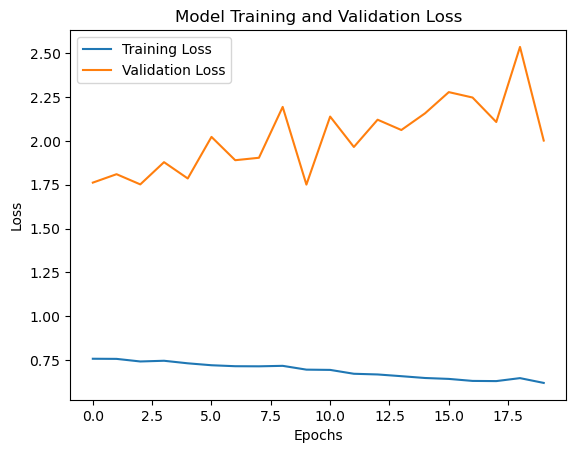

In [41]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This plot helps us understand how the model's performance improved over time and whether it is overfitting or underfitting the training data.

Finally, we use the model to make predictions on the test set and visualize these predictions alongside the actual data:

2/2 [==============================] - 0s 4ms/step


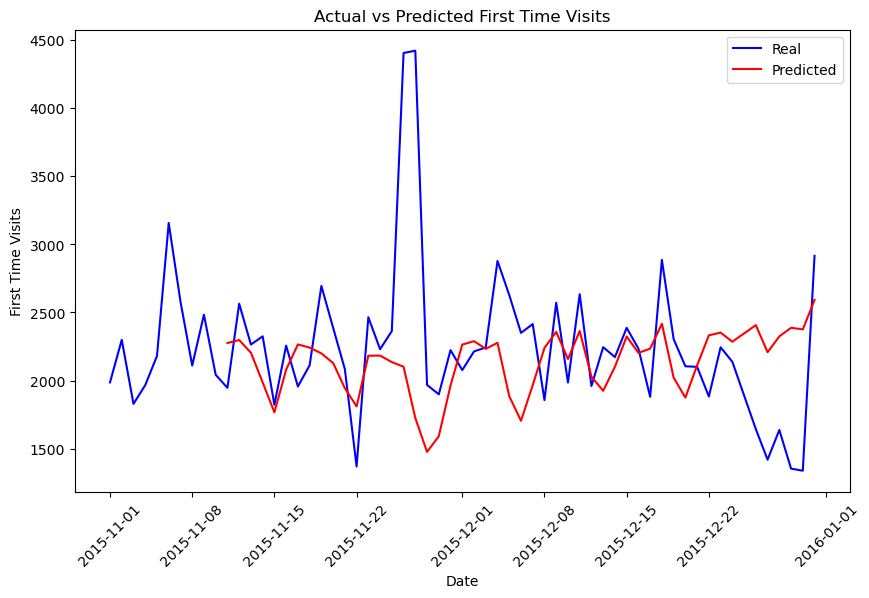

In [42]:
pred = model.predict(test_X)
plt.figure(figsize=(10, 6))
plt.plot(test_df["daily_sales"], label="Real", color='blue')
plt.plot(pd.DataFrame(index=test_df.index[lookback:], data=scaler_output.inverse_transform(pred)), label="Predicted", color='red')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted First Time Visits')
plt.xlabel('Date')
plt.ylabel('First Time Visits')
plt.legend()
plt.show()

The predicted values are scaled back to their original range using scaler_output.inverse_transform for a direct comparison with the actual data.
This visualization allows us to assess the model's predictive accuracy visually, comparing its forecasts against the true outcomes.

**Exercises to Complete:**


1.   Repeat the same process for Page.Loads, Unique.Visits, and Returning.Visits.
2.   For Page.Loads, visualize both the actual and the predicted values for the validation set as well.
3.   Experiment with a GRU (Gated Recurrent Unit)-based network for Page.Loads, and try implementing a network with multiple Dense layers after the GRU layer.
4.   Conduct the forecasting process for the meantemp column in DailyDelhiClimate.csv. Note that the meanpressure column contains outliers; filter these out first to ensure numerical stability. Set the training, validation, and testing periods to start in 2013, 2016, and 2017, respectively. Only include cyclical features for "day-of-the-year," omitting "day-of-the-week".
+1.  Why can we omit the "day-of-the-week" analysis?

**Exercise 1**

In [ ]:
# Place for your code

**Exercise 2**

In [ ]:
# Place for your code

**Exercise 3**

In [ ]:
# Place for your code

**Exercise 4**

In [ ]:
# Place for your code

**Exercise +1**

Place for your answer